<a href="https://colab.research.google.com/github/sethtroisi/OEIS/blob/master/A037274/HomePrimeStats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#@title Download home_primes datafile
!curl https://raw.githubusercontent.com/sethtroisi/OEIS/master/A037274/home_primes.txt > home_primes.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3963k  100 3963k    0     0  16.5M      0 --:--:-- --:--:-- --:--:-- 16.5M


In [18]:
home_primes = {}
with open("home_primes.txt") as f:
  # each line is "<base> <start> <step> <status>: <factor> <factor> ..."
  for line in f.readlines():
    pre, post = line.strip().split(":")
    *pre, status = pre.split()
    base, start, step, = map(int, pre)
    assert base == 10
    
    factors = list(map(int, post.split()))
    assert status in ("FF", "P", "CF"), line
    if status in ("P", "CF"):
      home_primes[(start, step, status)] = factors
      
print (len(home_primes), len(set(start for start,_,_ in home_primes)))

4999 4999


In [0]:
#@title Define Panda's dataframe

import math
import pandas as pd

starts = [start for start,_,_ in sorted(home_primes)]
steps  = [steps for _,steps,_ in sorted(home_primes)]
status = [status for _,_,status in sorted(home_primes)]
finished = [s == "P" for s in status]

number_bits = []
number_digits = []
for (start,_,_), factors in sorted(home_primes.items()):
  number_bits.append(int(math.ceil(sum(math.log2(f) for f in factors))))
  number_digits.append(int(sum(math.ceil(math.log10(f)) for f in factors)))

data={
    "start": starts,
    "steps": steps,
    "status": status,
    "number_bits": number_bits,
    "number_digits": number_digits,
}
df = pd.DataFrame(data)

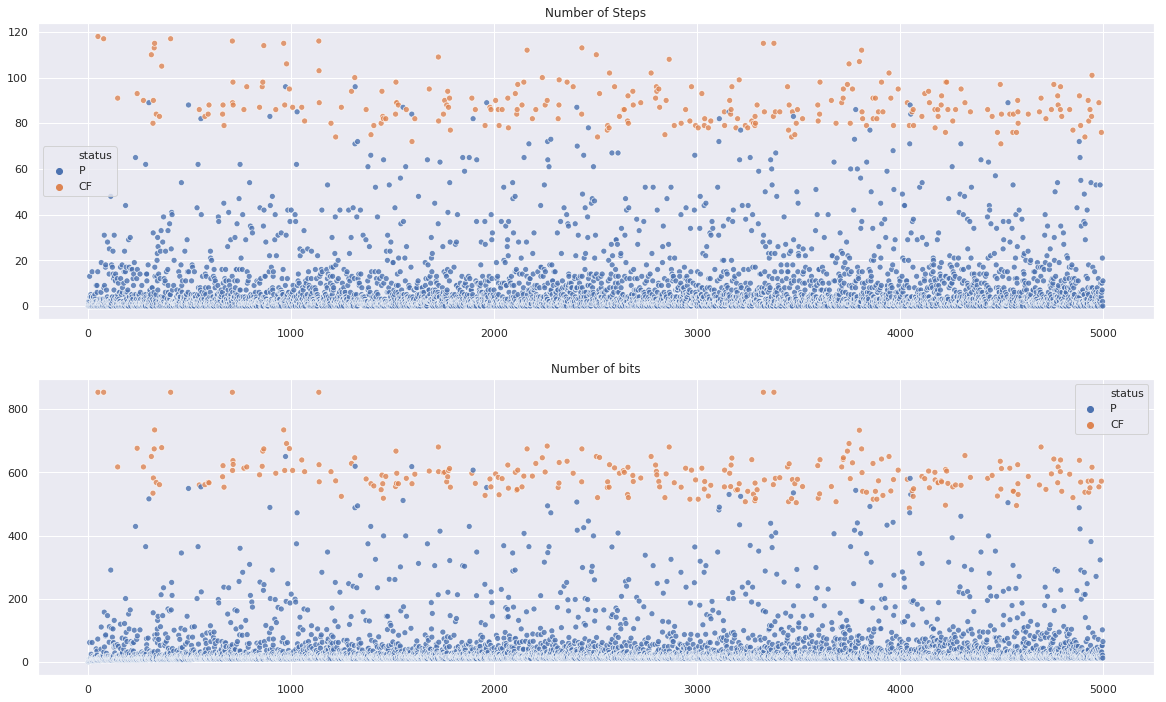

In [20]:
#@title Number of Steps/bits
from matplotlib import pyplot as plt
plt.figure(figsize=(20,12))

import seaborn as sns
sns.set()

plt.subplot(2, 1, 1)
ax = sns.scatterplot(x="start", y="steps", hue="status", data=df, alpha=0.8)
ax.set_title('Number of Steps')
ax.set_ylabel(''); ax.set_xlabel('')

plt.subplot(2, 1, 2)
ax = sns.scatterplot(x="start", y="number_bits", hue="status", data=df, alpha=0.8)
ax.set_title('Number of bits')
ax.set_ylabel(''); ax.set_xlabel('')

pass

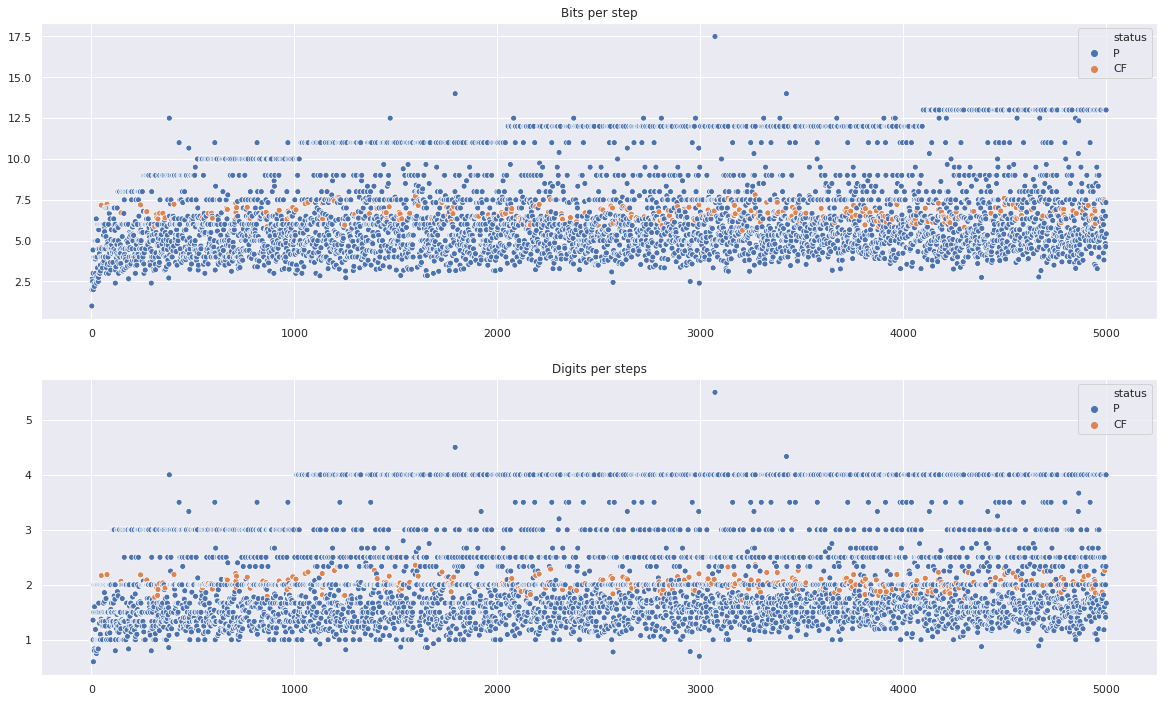

In [21]:
#@title Digits/Bits per step
plt.figure(figsize=(20,12))

bit_steps = [bits / (num_steps + 1) for bits, num_steps in zip(number_bits, steps)] 
digit_steps = [digits / (num_steps + 1) for digits, num_steps in zip(number_digits, steps)] 

plt.subplot(2, 1, 1)
ax = sns.scatterplot(x="start", y=bit_steps, hue="status", data=df)
ax.set_title('Bits per step')
ax.set_xlabel('')

plt.subplot(2, 1, 2)
ax = sns.scatterplot(x="start", y=digit_steps, hue="status", data=df)
ax.set_title('Digits per steps')
ax.set_xlabel('')


pass